<a href="https://colab.research.google.com/github/Viratvenom/AIRBNB-EDA-PROJECT/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_MAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**EDA PROJECT AIRBUB OBSERVATIONS**

In [3]:
#refer Geopandas 0.12.1 at htpps://geopandas.org/index.html and part 1 - introduction to geographic data science .ipynb at https://colab.research.google.com
!apt install gdal-bin python-gdal python3-gdal #install geopython libraries
!apt install python4-rtree #install python3-rtree - Geopandas requirment
!apt install git+git://github.com/geopandas/geopandas.git #install geopandas
!pip install descartes #install descartes - Geopandas requirement
!pip install geopandas
!pip install plotly 
import plotly.express as px


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (5,845 kB/s)
Selecting previously unselected 

In [317]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import point
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn.metrics as metrics


In [318]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [319]:
working_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'


In [320]:
Airbnb_df = pd.read_csv(working_path)

In [321]:
Airbnb_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [322]:
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [323]:
Airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [324]:
Airbnb_df.drop(['id','last_review'], inplace = True, axis =1)

In [325]:
Airbnb_df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [326]:
Airbnb_df.dropna(subset=['reviews_per_month']).head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [327]:
#define Airbnb collection 
Airbnb_df =Airbnb_df.query('price') #log scale
figAirbnb = px.scatter (Airbnb_df,x = 'price' , y ='reviews_per_month',log_x=True)
figAirbnb.show()

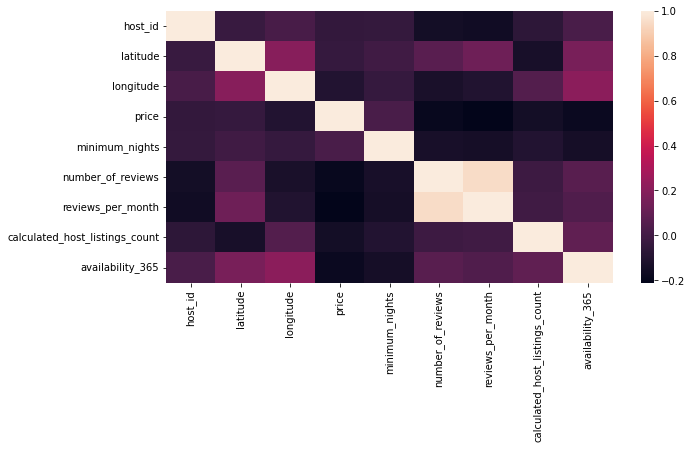

In [328]:
#plot heat map
plt.figure(figsize=(10,5))
cor = Airbnb_df.corr()
sns.heatmap(cor,)

In [329]:
map_df =pd.read_csv(working_path,usecols=[1,2,3,4,5,6,7])

In [330]:
map_df = gpd.GeoDataFrame(map_df,geometry = gpd.points_from_xy(map_df.latitude ,map_df.longitude))

In [331]:
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [332]:
map_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,geometry
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,POINT (40.64749 -73.97237)
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,POINT (40.75362 -73.98377)
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,POINT (40.80902 -73.94190)
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,POINT (40.68514 -73.95976)
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,POINT (40.79851 -73.94399)


In [333]:
map_df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [334]:
map_df.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [335]:
map_df.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


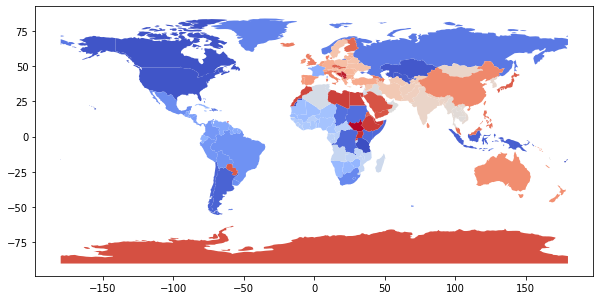

In [336]:
# plot confirmed cases world map 
map_df.plot(cmap = 'coolwarm')

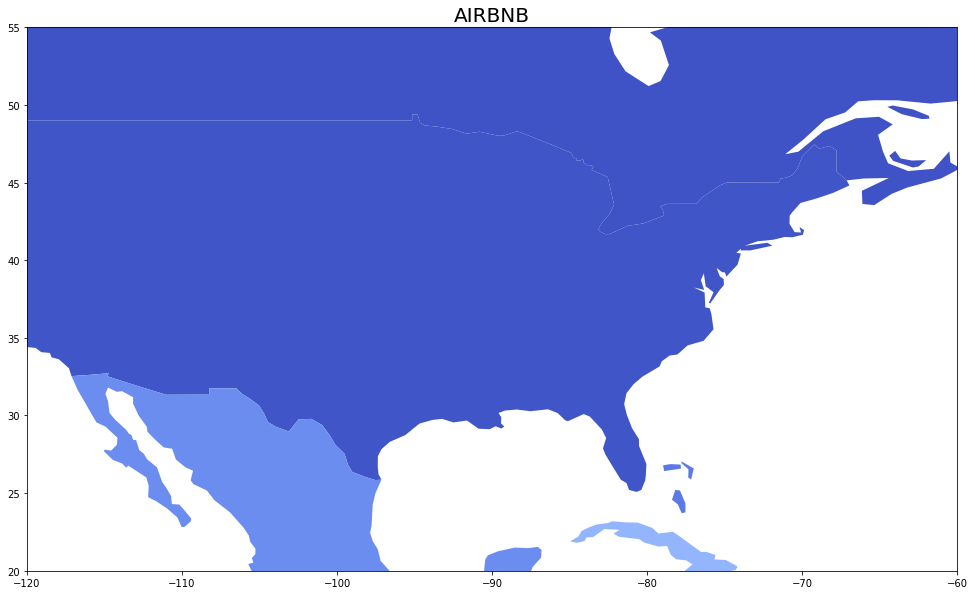

In [337]:
map_df.plot(figsize=(25,10),cmap='coolwarm')
plt.xlim(-120,-60)
plt.ylim(20,55)
plt.title('AIRBNB',fontsize=20)
plt.show()

**1. What can we learn about different hosts and areas?**

In [338]:
hosts_areas = Airbnb_df.groupby(['host_id','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head()

,host_id,neighbourhood_group,calculated_host_listings_count
569,7503643,Brooklyn,52
298,417504,Brooklyn,28
565,6885157,Brooklyn,15
250,310670,Bronx,13
448,1177497,Brooklyn,11


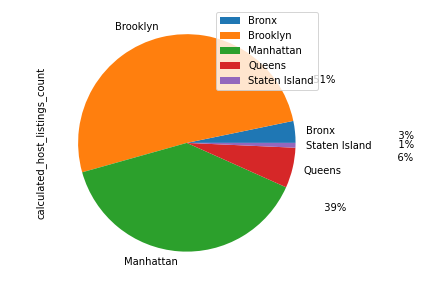

In [339]:
hosts_areas.groupby(['neighbourhood_group']).sum().plot(
    kind='pie', y='calculated_host_listings_count', autopct='%100.0f%%')
#The pie chart shows that airbub listing in newyork are near manhattan and brooklyn has the highest share of hotels.

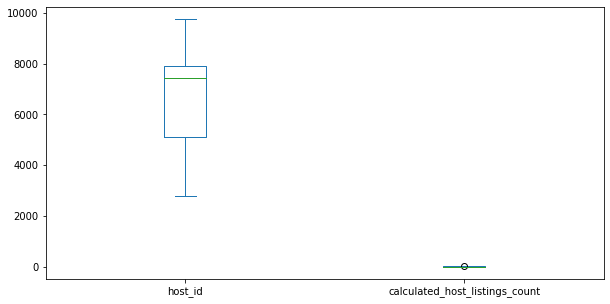

In [340]:
hosts_areas[:10].plot(kind = 'box')

**2. What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [341]:
areas_reviews = Airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,271
1,Brooklyn,480
2,Manhattan,458
3,Queens,441
4,Staten Island,333


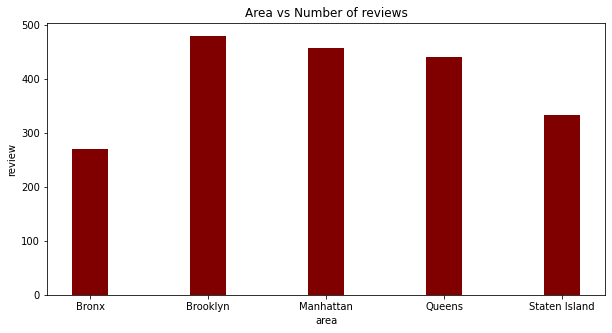

In [342]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.3)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [343]:
price = Airbnb_df.groupby(['reviews_per_month'])['price'].max().reset_index()
price.head()

,reviews_per_month,price
0,0.01,149
1,0.02,255
2,0.03,260
3,0.04,205
4,0.05,700


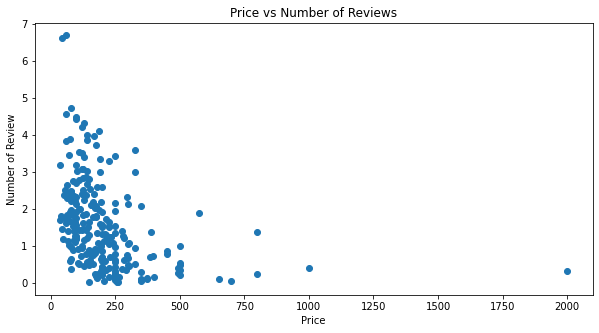

In [344]:
area = price['price']
price = price['reviews_per_month']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

3.Which hosts are the busiest and why?

In [345]:
host_Name = Airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_Name.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(15)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
507,Vida,Brooklyn,52
481,The Box House Hotel,Brooklyn,28
406,Randy,Brooklyn,15
508,Vie,Bronx,13
195,Henry,Manhattan,11
229,Jessica,Brooklyn,11
50,Ariel,Manhattan,9
215,Jason,Queens,8
75,Carol Gloria,Bronx,7
237,John,Brooklyn,6


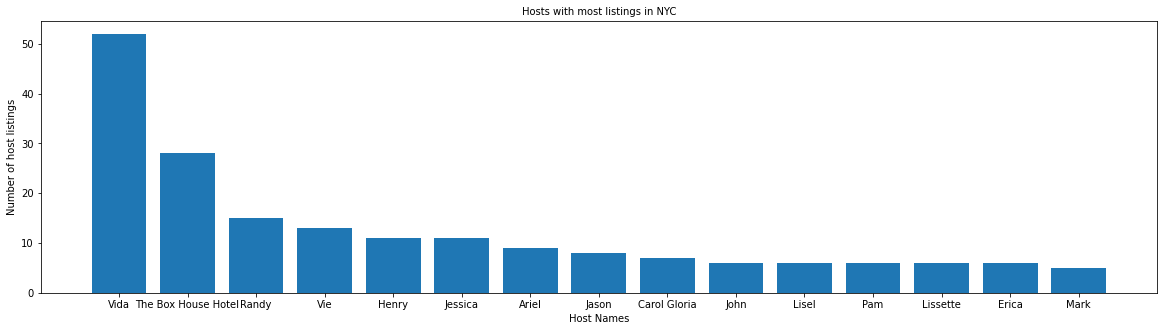

In [353]:
plt.rcParams['figure.figsize'] = (20,5)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':10})
plt.xlabel('Host Names',{'fontsize':10})
plt.ylabel('Number of host listings',{'fontsize':10})
plt.show()

In [355]:
from scipy.stats import multivariate_hypergeom
multivariate_hypergeom

3. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [356]:
traffic = Airbnb_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic = traffic.sort_values(by='minimum_nights', ascending=False)
traffic

,neighbourhood_group,room_type,minimum_nights
3,Brooklyn,Private room,13982
5,Manhattan,Private room,10855
2,Brooklyn,Entire home/apt,10257
4,Manhattan,Entire home/apt,9820
8,Queens,Private room,1725
10,Staten Island,Private room,1287
7,Queens,Entire home/apt,618
6,Manhattan,Shared room,211
1,Bronx,Private room,119
0,Bronx,Entire home/apt,17


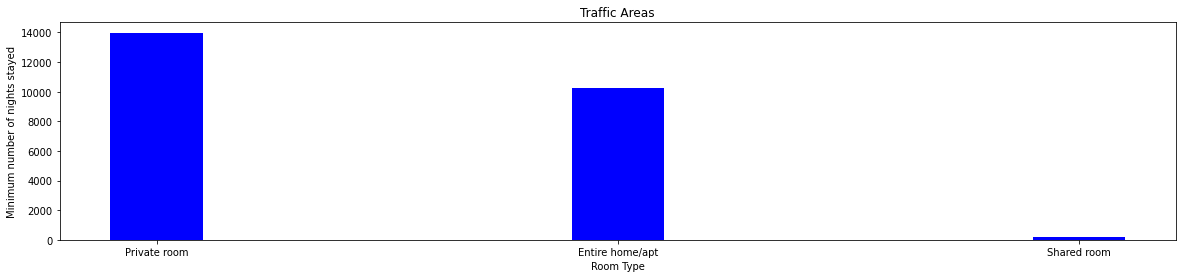

In [358]:
room_type = traffic['room_type']
stayed = traffic['minimum_nights']

fig = plt.figure(figsize = (20, 4))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='blue',
        width = 0.2)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

Conclusion:
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers